In [1]:
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

import matplotlib.pyplot as plt
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

import tensorflow as tf
from numpy.random import seed

C:\Users\frbj\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Getting the data

In [2]:
digits = load_digits()

See the notebook for lecture 11 for an exploration of this dataset.

In [3]:
X = digits.data
y = digits.target
Y = to_categorical(y, 10)
X = X.reshape([-1, 8, 8, 1])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y)

# Training the neural network

In [4]:
seed(0)
tf.random.set_seed(0)

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'tanh', input_shape = X_train[0].shape)) 
#32 feature maps, 3-by-3 local receptive fields
model.add(MaxPooling2D(pool_size = (2,2))) #pooling layer
model.add(Flatten())
model.add(Dense(units = 10, activation = 'softmax')) #output layer

sgd = optimizers.SGD(learning_rate = 0.1)
model.compile(loss='categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

history = model.fit(X_train, Y_train, epochs = 10, batch_size = 50, validation_split = 0.3, verbose = 1)

Epoch 1/10
19/19 [==============================] - 4s 86ms/step - loss: 1.9137 - accuracy: 0.4087 - val_loss: 0.9338 - val_accuracy: 0.7457
Epoch 2/10
19/19 [==============================] - 0s 15ms/step - loss: 0.5012 - accuracy: 0.8875 - val_loss: 0.4012 - val_accuracy: 0.9037
Epoch 3/10
19/19 [==============================] - 0s 18ms/step - loss: 0.2891 - accuracy: 0.9384 - val_loss: 0.2874 - val_accuracy: 0.9284
Epoch 4/10
19/19 [==============================] - 0s 16ms/step - loss: 0.2132 - accuracy: 0.9586 - val_loss: 0.2787 - val_accuracy: 0.9136
Epoch 5/10
19/19 [==============================] - 0s 17ms/step - loss: 0.1678 - accuracy: 0.9671 - val_loss: 0.2092 - val_accuracy: 0.9531
Epoch 6/10
19/19 [==============================] - 0s 16ms/step - loss: 0.1422 - accuracy: 0.9766 - val_loss: 0.2065 - val_accuracy: 0.9481
Epoch 7/10
19/19 [==============================] - 0s 15ms/step - loss: 0.1173 - accuracy: 0.9809 - val_loss: 0.1771 - val_accuracy: 0.9580
Epoch 8/10
19

# Evaluate the model

In [5]:
print("Accuracy on test data: {}".format(model.evaluate(X_test, Y_test)))

15/15 [==============================] - 0s 5ms/step - loss: 0.1227 - accuracy: 0.9689
Accuracy on test data: [0.12270689010620117, 0.9688888788223267]


Text(0, 0.5, 'Accuracy')

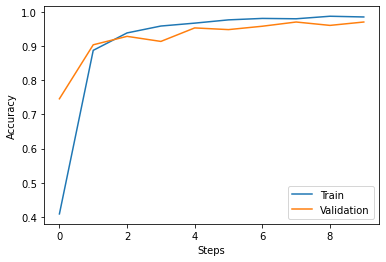

In [6]:
steps = len(history.history['accuracy'])
plt.plot(np.arange(steps), history.history['accuracy'], label = 'Train')
plt.plot(np.arange(steps), history.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Accuracy')